In [1]:
import pandas as pd
import seaborn as sns
import os
from os import listdir
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.models import Sequential


from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

import numpy as np

import cv2

from sklearn.metrics import classification_report
from keras.models import load_model
import matplotlib.pyplot as plt

from keras.callbacks import CSVLogger
from keras import metrics
from keras import backend as K
from keras.layers.normalization import BatchNormalization

from tensorflow.python.framework import ops




Using TensorFlow backend.


This model has a much deeper number of CNN layers

In [2]:
datasetAF = pd.read_csv("D:\\Dropbox\\utd\\cs courses\\cs 4375 machine learning\\assignments\\project\\rating csv data\\All_Ratings asian female csv.txt",header = 0)
avgPerFile = datasetAF['Rating'].groupby(datasetAF['Filename'],sort=False)
averagePerFileMean = avgPerFile.mean()
preparedAFDataset = pd.DataFrame({'Filename':averagePerFileMean.index, 'Avg Rating':averagePerFileMean.values})
labels = preparedAFDataset['Avg Rating']
labels.head(10)

0    2.333333
1    3.950000
2    3.183333
3    2.683333
4    2.000000
5    1.566667
6    2.566667
7    2.750000
8    2.150000
9    3.433333
Name: Avg Rating, dtype: float64

In [3]:
#needed to join path because windows
train_path = os.path.join('C:/', 'Users/alegAsus/Downloads/SCUT-FBP5500_v2.1/SCUT-FBP5500_v2/AF/AF/')
images = []
#adapted from https://www.quora.com/How-do-I-load-train-and-test-data-from-the-local-drive-for-a-deep-learning-Keras-model
#listdir returns a list containing the names of the entries in the directory given by path.
for sample in listdir(train_path):
    img_path = train_path + sample #sample is every file in the train directory
    x = cv2.imread(img_path) #loading file
    x = cv2.resize(x, (96, 96))
    # preprocessing if required
    images.append(x) #adding to x_train array
#scale all pixels to between 0 and 1
imagesNumPy = np.array(images, dtype="float") / 255.0


In [4]:
(trainX, testX, trainY, testY) = train_test_split(imagesNumPy, labels,test_size=0.30, random_state=42)

In [5]:
#run this model with Dense(notDefinedVariable) to see functions in tensorflow that are to be depreciated
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=trainX.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(1024, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(1024, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
#1 because it outputs only one rating
model.add(Dense(1))


# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001)

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

# Let's train the model using RMSprop
model.compile(loss=root_mean_squared_error,
              optimizer=opt,
              metrics=[metrics.mae])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
csv_logger = CSVLogger(os.path.join('C:/', 'Users/alegAsus/Downloads/SCUT-FBP5500_v2.1/SCUT-FBP5500_v2/saved models/continous RMSE/callbacks RMSE Deep.log'), separator=',', append=False)
modelHistory = model.fit(trainX, trainY,
              batch_size=32,
              epochs=64,
              validation_data=(testX, testY),
              shuffle=True, callbacks=[csv_logger])

Train on 1400 samples, validate on 600 samples
Epoch 1/64
1400/1400 [==============================] - 135s 96ms/step - loss: 2.1246 - mean_absolute_error: 1.7263 - val_loss: 0.8681 - val_mean_absolute_error: 0.7191
Epoch 2/64
1400/1400 [==============================] - 129s 92ms/step - loss: 1.2239 - mean_absolute_error: 0.9853 - val_loss: 0.7984 - val_mean_absolute_error: 0.6508
Epoch 3/64
1400/1400 [==============================] - 131s 94ms/step - loss: 1.0121 - mean_absolute_error: 0.8153 - val_loss: 0.9533 - val_mean_absolute_error: 0.7691
Epoch 4/64
1400/1400 [==============================] - 129s 92ms/step - loss: 0.9351 - mean_absolute_error: 0.7470 - val_loss: 0.8043 - val_mean_absolute_error: 0.6714
Epoch 5/64
1400/1400 [==============================] - 129s 92ms/step - loss: 0.8966 - mean_absolute_error: 0.7263 - val_loss: 0.9120 - val_mean_absolute_error: 0.7595
Epoch 6/64
1400/1400 [==============================] - 127s 90ms/step - loss: 0.8795 - mean_absolute_error:

Epoch 49/64
1400/1400 [==============================] - 130s 93ms/step - loss: 0.5789 - mean_absolute_error: 0.4625 - val_loss: 0.9854 - val_mean_absolute_error: 0.7971
Epoch 50/64
1400/1400 [==============================] - 127s 91ms/step - loss: 0.5803 - mean_absolute_error: 0.4689 - val_loss: 0.9398 - val_mean_absolute_error: 0.7571
Epoch 51/64
1400/1400 [==============================] - 129s 92ms/step - loss: 0.5741 - mean_absolute_error: 0.4611 - val_loss: 0.8489 - val_mean_absolute_error: 0.6855
Epoch 52/64
1400/1400 [==============================] - 129s 92ms/step - loss: 0.5636 - mean_absolute_error: 0.4509 - val_loss: 0.9437 - val_mean_absolute_error: 0.7673
Epoch 53/64
1400/1400 [==============================] - 128s 92ms/step - loss: 0.5650 - mean_absolute_error: 0.4513 - val_loss: 0.8337 - val_mean_absolute_error: 0.6710
Epoch 54/64
1400/1400 [==============================] - 125s 90ms/step - loss: 0.5519 - mean_absolute_error: 0.4448 - val_loss: 0.9130 - val_mean_abs

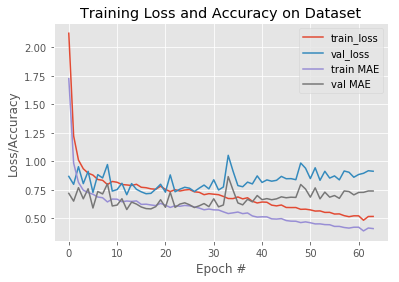

In [7]:
#N is the number of epochs
#plot code from https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/
N = 64
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), modelHistory.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), modelHistory.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), modelHistory.history["mean_absolute_error"], label="train MAE")
plt.plot(np.arange(0, N), modelHistory.history["val_mean_absolute_error"], label="val MAE")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

In [8]:
historyDF = pd.read_csv("C:\\Users\\alegAsus\\Downloads\\SCUT-FBP5500_v2.1\\SCUT-FBP5500_v2\\saved models\\continous RMSE\\callbacks RMSE Deep.log",header = 0)
historyDF.head(12)

,epoch,loss,mean_absolute_error,val_loss,val_mean_absolute_error
0,0,2.124616,1.726342,0.868098,0.719110
1,1,1.223946,0.985300,0.798350,0.650816
2,2,1.012120,0.815330,0.953331,0.769071
3,3,0.935069,0.746973,0.804311,0.671390
4,4,0.896553,0.726273,0.912046,0.759536
5,5,0.879547,0.711310,0.727317,0.590547
6,6,0.840899,0.687035,0.883487,0.735453
7,7,0.833744,0.680626,0.854266,0.714056
8,8,0.796326,0.643887,0.972279,0.803358
9,9,0.823585,0.669180,0.738921,0.608370


The lowest MAE is achieved at epoch 10

In [9]:
historyDF['val_mean_absolute_error'].min()

0.5768909645080567

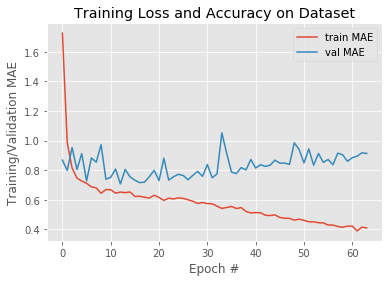

In [10]:
N = 64
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), historyDF.iloc[0:N, 2], label="train MAE")
plt.plot(np.arange(0, N), historyDF.iloc[0:N, 3], label="val MAE")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Training/Validation MAE")
plt.legend(loc="upper right")